# Vector Data

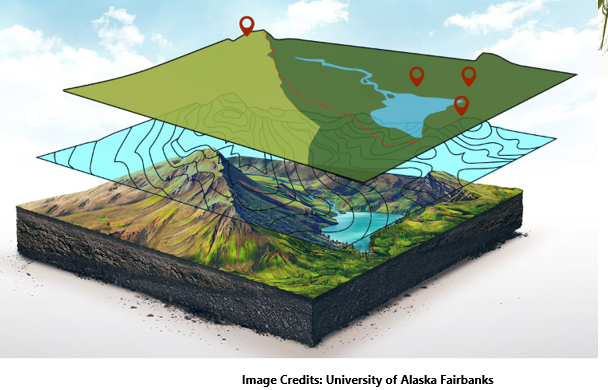

Vector data represent objects on the Earth's surface using their longitude and latitude, as well as combinations of the pairs of coordinates (lines, polylines, polygons, etc.).

<b>Point data</b>

A pair of coordinates (longitude, latitude), that represents the location of points on the Earth's surface.

Example: Location of drop boxes, landmarks, etc.

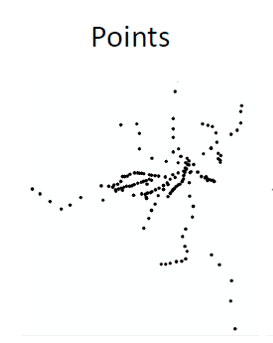

<b>Lines</b>

A series of points that represents a line (straight or otherwise) on the Earth's surface.

Example: Center of roads, rivers, etc.

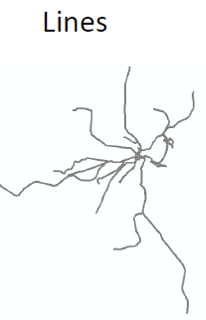

<b>Polygons</b>
A series of points (vertices) that define the outer edge of a region. Example: Outlines of cities, countries, continents, etc.

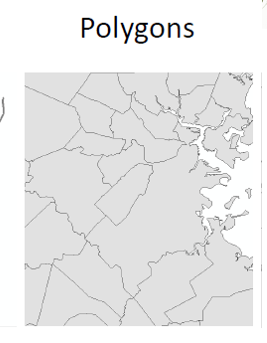

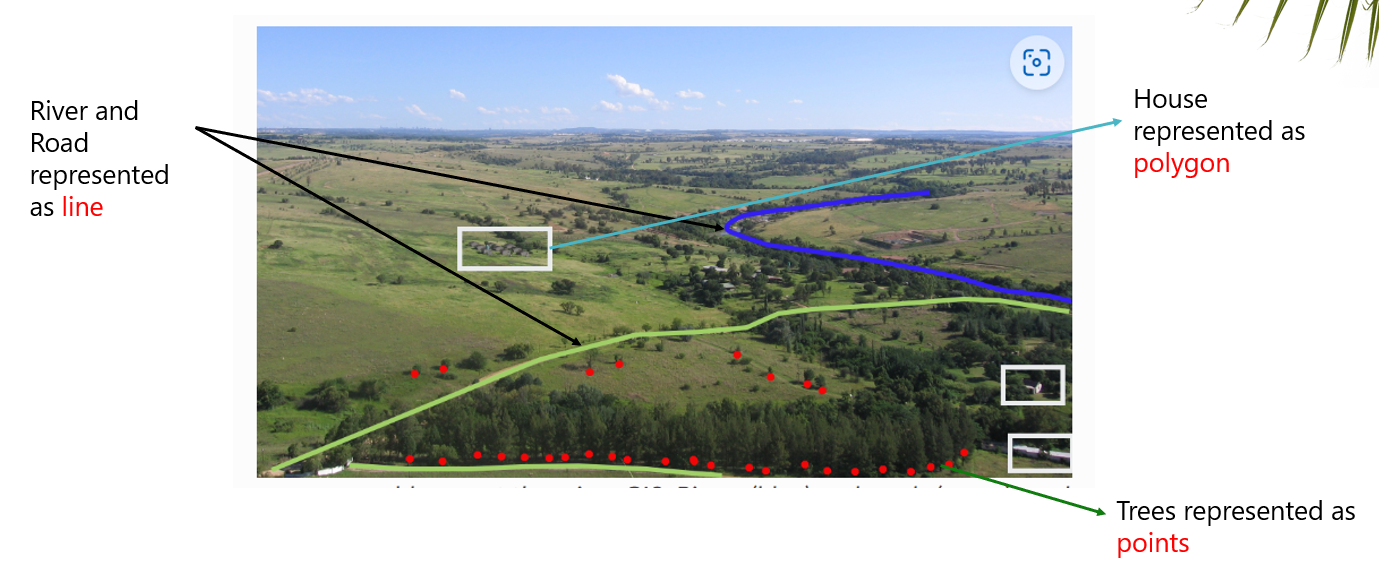

<b> Credits:</b>
community/beginners-cookbook.
* **GeoPandas Tutorial** http://http://geopandas.org/


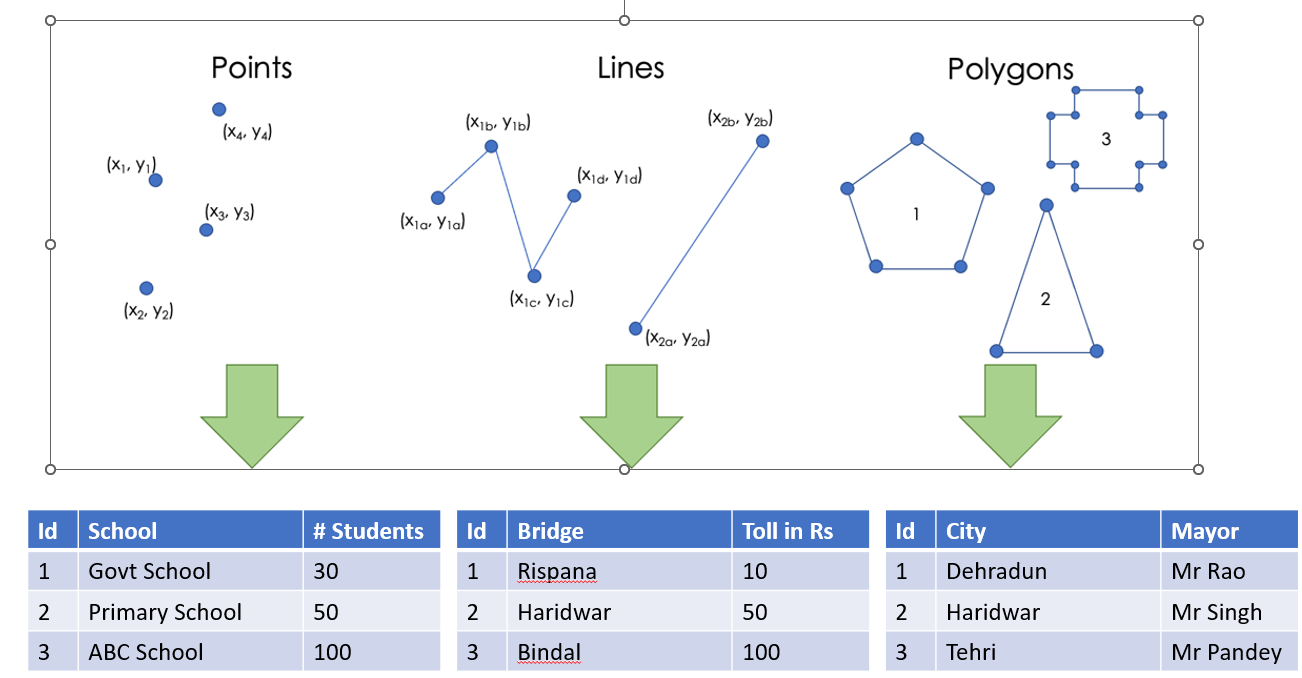

# Introduction to Pandas

**Learning Objectives:**
  * Gain an introduction to the `DataFrame` and `Series` data structures of the *pandas* library
  * Access and manipulate data within a `DataFrame` and `Series`
  * Import CSV data into a *pandas* `DataFrame`


pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

[*pandas*](http://pandas.pydata.org/) is a column-oriented data analysis python library. It's a great tool for handling and analyzing input data.

# Pandas Basics

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation.

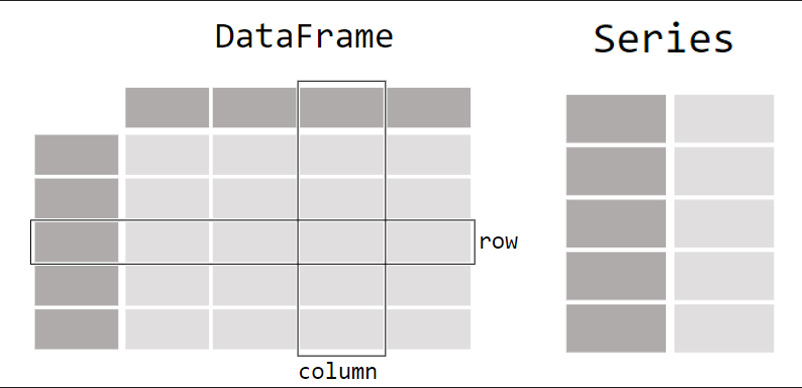

In [ ]:
import pandas as pd
#import os
#import shapely

One way to create a `Series` is to construct a `Series` object by passing a list of values. For example:

In [ ]:
pd.Series(['Dehradun','Almora','Pithoragarh'])

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`.

In [ ]:
city_names = pd.Series(['Dehradun','Almora','Pithoragarh'])
population = pd.Series([10000,200000,3000000])

In [ ]:
pd.DataFrame({ 'City Name': city_names, 'Population': population })

# Reading csv File

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.chdir('/content/drive/MyDrive/data/India')

In [ ]:
file_name = 'stations.csv'

In [ ]:
df = pd.read_csv(file_name)

In [ ]:
df

The example above used `DataFrame.describe` to show interesting statistics about a `DataFrame`. Another useful function is `DataFrame.head`, and `DataFrame.tail` which displays the first few records of a `DataFrame`:

In [ ]:
df.describe()

In [ ]:
df.head(10)

In [ ]:
df.tail()

## Accessing Data

You can access `DataFrame` data using familiar Python dict/list operations:

In [ ]:
df['STATION ID']

In [ ]:
df['STATION ID'][2]

In [ ]:
df['STATION ID'][4:8]

In [ ]:
df[df['STATION']=='NAGTHAT']

## Manipulating Data

You may apply Python's basic arithmetic operations to `Series`. For example:

In [ ]:
df['Lat in Min'] = df['Latitude'] * 60

In [ ]:
df.head()

In [ ]:
df.sort_values(by=['Latitude'])

# Introduction to Geo Pandas

**Learning Objectives:**
  * Gain an introduction to the `GeoDataFrame` and `GeoSeries` data structures of the *geopandas* library
  * Access and manipulate data within a `GeoDataFrame` and `GeoSeries`
  * Reading Vector Data
  * Manipulating Vector Data
  * Processing Vector data
  * Writing Vector Data
  

# GeoPandas Basics

`GeoPandas` is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow `spatial operations` on geometric types.

The primary data structures in *geopandas* are implemented as two classes:

  * **`GeoSeries`**, is essentially a vector where each entry in the vector is a set of shapes corresponding to one observation. *Geopandas** has three basic classes of geometric objects:

    * Points / Multi-Points
    * Lines / Multi-Lines
    * Polygons / Multi-Polygons

  

* **`GeoDataFrame`**, is a tabular data structure that contains a *GeoSeries*.The most important property of a *GeoDataFrame* is that it always has one *GeoSeries* column that holds a special status. This GeoSeries is referred to as the GeoDataFrame’s **“geometry”**.

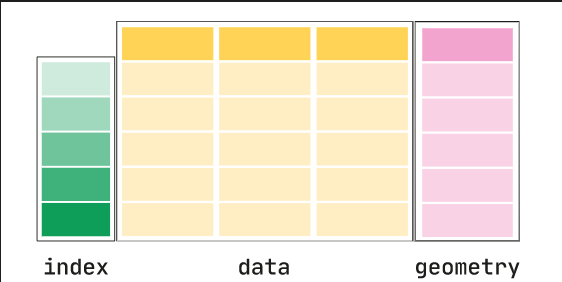

# Reading and Writing Spatial  Data

# Vector Data Formats

**`ESRI Sahpe File`** is simple, nontopological format for storing the geometric location and attribute information of geographic features.The shapefile format defines the geometry and attributes of geographically referenced features in three or more files with specific file extensions:
 * .shp—The main file that stores the feature geometry; required.
 * .shx—The index file that stores the index of the feature geometry; required.
 * .dbf—The dBASE table that stores the attribute information of features; required.
 * .sbn and .sbx—The files that store the spatial index of the features.
 * .prj—The file that stores the coordinate system information


**`GeoJSON`** GeoJSON is a format for encoding a variety of geographic data structures.A *GeoJSON* object may represent a region of space (a Geometry), a spatially bounded entity (a Feature), or a list of Features (a FeatureCollection). GeoJSON supports the following geometry types: Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon, and GeometryCollection. Features in GeoJSON contain a Geometry object and additional properties, and a FeatureCollection contains a list of Features.


 {
  "type": "Feature",
  
  "geometry": {
    
    "type": "Point",
    "coordinates": [78, 30]
  },
  
  "properties": {
    "name": "Dehradun"
  }

}

**`Geography Markup Language`**

**`Keyhole Markup Language`**

**`MongoDB`**

**`Microsoft SQL Server Spatial Database`**

**`OGC WFS service`**

**`etc.`**

# Reading Shape File

In [ ]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopandas import GeoSeries

In [ ]:
vector_file = 'STATE_BOUNDARY.shp'

In [ ]:
india = gpd.read_file(vector_file)

In [ ]:
type(india)

In [ ]:
india.geometry.name

In [ ]:
india.crs

Renaming a Column

In [ ]:
india = india.rename(columns={'geometry': 'borders'}).set_geometry('borders')

In [ ]:
india.head()

In [ ]:
india.plot(figsize=(10, 10))

# Reading Shape File(.zip)

In [ ]:
vector_file = r'zip://Administrative_Boundary_Database.zip!MAJOR_TOWNS.shp'

In [ ]:
india = gpd.read_file(vector_file)

In [ ]:
india.head()

In [ ]:
india.plot(figsize=(18, 14))

In [ ]:
plt.close()

In [ ]:
india.head()

# Subsetting *GeoDataFrame* File

In [ ]:
subset = india[india['state']=='UTTARAKHAND']

In [ ]:
subset

In [ ]:
subset.plot()

In [ ]:
subset.plot(figsize=(10, 10))

In [ ]:
!pip install mapclassify

In [ ]:
subset.explore('district', legend=False)

In [ ]:
plt.close()

In [ ]:
uk = india[india['state']=='UTTARAKHAND']

<Axes: >

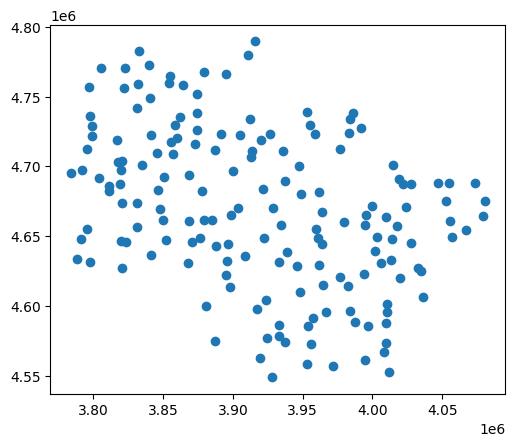

In [ ]:
uk.plot()

## Reading GeoJSON File

In [ ]:
gson = 'india.geojson'

In [ ]:
uk = gpd.read_file(gson)

In [ ]:
uk.head()

,STATE,State_LGD,Shape_Leng,Shape_Area,geometry
0,ANDAMAN & NICOBAR,35,5.824763e+06,7.837276e+09,"MULTIPOLYGON (((5575271.41860 2199389.82110, 5..."
1,ANDHRA PRADESH,28,5.334647e+06,1.599742e+11,"POLYGON ((4484061.30400 3482639.72020, 4484153..."
2,ARUN>CHAL PRADESH,12,2.618522e+06,7.933917e+10,"POLYGON ((5541236.36930 4673135.88970, 5543000..."
3,ASSAM,18,3.228020e+06,7.554956e+10,"POLYGON ((5310055.31110 4167338.81740, 5310055..."
4,BIH>R,10,2.980745e+06,9.061637e+10,"POLYGON ((4398747.07540 4388549.51630, 4398767..."


# Writing *Shape* File

In [ ]:
vector_file = r'zip://Administrative_Boundary_Database.zip!DISTRICT_BOUNDARY.shp'

In [ ]:
india = gpd.read_file(vector_file)

In [ ]:
uk = india[india['STATE']=='UTTAR>KHAND']

<Axes: >

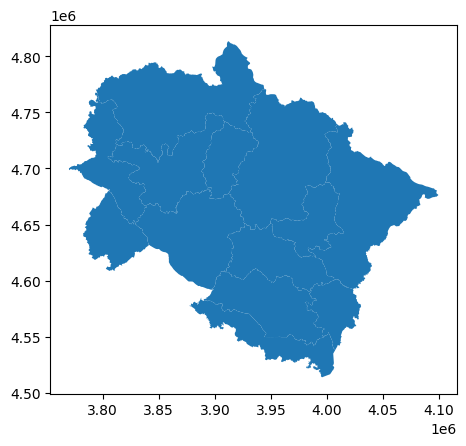

In [ ]:
uk.plot()

In [ ]:
uk.to_file('uttarakhand.shp')

# Writing *GeoJSON* File

In [ ]:
uk.to_file('almora.geojson',driver='GeoJSON')

You can read these in, just as you would a shapefile with gpd.read_file

In [ ]:
uk = gpd.read_file('almora.geojson')

## Managing Projections

**Coordinate Reference Systems (CRS)**
A Coordinate Reference System (CRS) describes how the coordinates in a geospatial dataset relate to locations on the surface of the earth.

**A geographic CRS consists of:**

A 3D model of the shape of the earth (a datum), approximated as a sphere or spheroid (e.g., an ellipsoid),
The units of the coordinate system (e.g, decimal degrees, meters, feet), and
The origin (i.e., the 0,0 location), specified as the meeting of the equator and the prime meridian.

**A projected CRS consists of:**

A geographic CRS, and
A map projection and related parameters used to transform the geographic coordinates to 2D space.
A map projection is a mathematical model used to transform coordinate data

CRS are important because the geometric shapes in a `GeoSeries` or `GeoDataFrame` object are simply a collection of coordinates in an arbitrary space. A CRS tells Python how those coordinates related to places on the Earth.


*geopandas* can accept lots of representations of CRS
* Proj4 String: "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"
* parameters broken out in a dictionary: {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84'})
* EPSG codes directly

## Identifying the CRS of a GeoDataFrame

In [ ]:
vector_file = r'zip://Administrative_Boundary_Database.zip!STATE_BOUNDARY.shp'
india = gpd.read_file(vector_file)

In [ ]:
india.crs

<Projected CRS: PROJCS["LCC_WGS84",GEOGCS["WGS 84",DATUM["WGS_1984 ...>
Name: LCC_WGS84
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Setting a Projection

Setting a projection is how one tells geopandas how to interpret coordinates. CRS can be set by setting
 **<geo_series>.crs={'init' :'epsg:4326'}**

In [ ]:
india.crs = None

In [ ]:
india.crs

# Re-Projecting

Re-projecting is the process of changing the representation of locations from one coordinate system to another.data can be re-projected using the **to_crs** command

In [ ]:
india = gpd.read_file(vector_file)

In [ ]:
india.crs

<Projected CRS: PROJCS["LCC_WGS84",GEOGCS["WGS 84",DATUM["WGS_1984 ...>
Name: LCC_WGS84
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
india_rep = india.to_crs(epsg=3857)

Text(0.5, 1.0, 'Mercator')

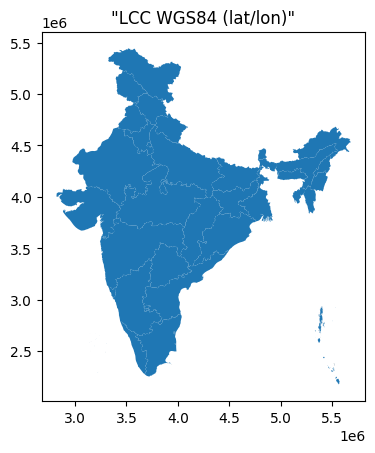

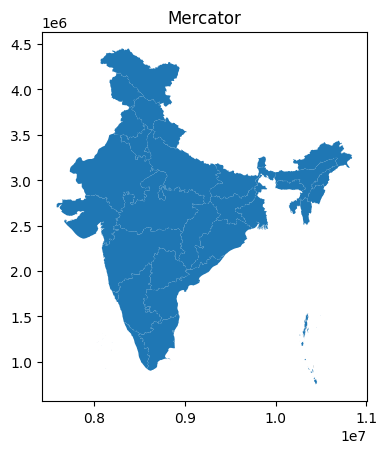

In [ ]:
india.plot()
plt.title('"LCC WGS84 (lat/lon)"')


india_rep.plot()
plt.title("Mercator")

# Mapping with GeoPandas

In [ ]:
vector_file = r'zip://Administrative_Boundary_Database.zip!STATE_BOUNDARY.shp'

*geopandas* provides a high-level interface to the `matplotlib` library for making maps. Mapping shapes is as easy as using the `plot()` method on a GeoSeries or GeoDataFrame.

In [ ]:
india = gpd.read_file(vector_file)

In [ ]:
india.head()

,STATE,State_LGD,Shape_Leng,Shape_Area,geometry
0,ANDAMAN & NICOBAR,35,5.824763e+06,7.837276e+09,"MULTIPOLYGON (((5575271.419 2199389.821, 55752..."
1,ANDHRA PRADESH,28,5.334647e+06,1.599742e+11,"POLYGON ((4484061.304 3482639.720, 4484153.303..."
2,ARUN>CHAL PRADESH,12,2.618522e+06,7.933917e+10,"POLYGON ((5541236.369 4673135.890, 5543000.102..."
3,ASSAM,18,3.228020e+06,7.554956e+10,"POLYGON ((5310055.311 4167338.817, 5310055.270..."
4,BIH>R,10,2.980745e+06,9.061637e+10,"POLYGON ((4398747.075 4388549.516, 4398767.519..."


<Axes: >

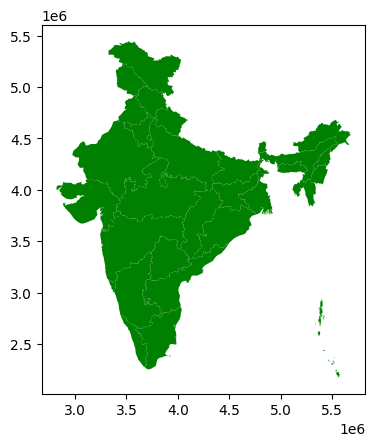

In [ ]:
india.plot(color='green')

<Axes: >

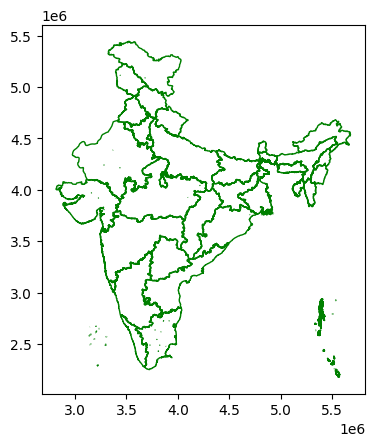

In [ ]:
india.plot(edgecolor='green',  facecolor='none')

# Choropleth Maps

*geopanda* makes it easy to create Choropleth maps (maps where the color of each shape is based on the value of an associated variable)

<Axes: >

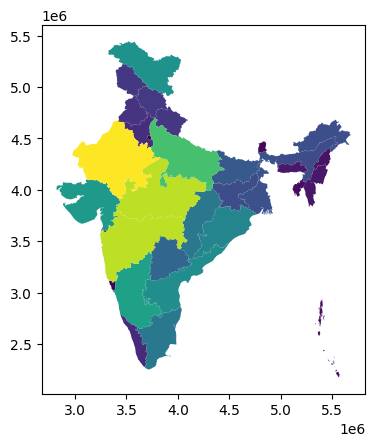

In [ ]:
india.plot(column='Shape_Area')

# Creating a legend

When plotting a map, one can enable a *legend* using the legend argument

<Axes: >

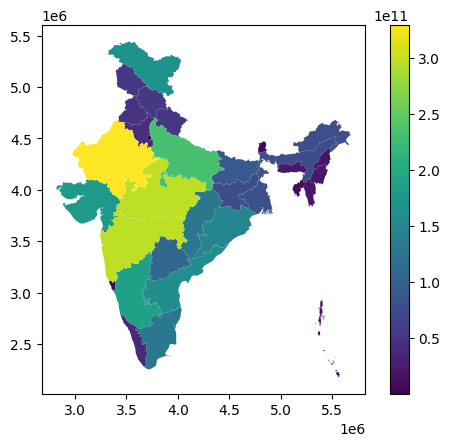

In [ ]:
india.plot(column='Shape_Area',legend=True)

# Changing a legend Orientation

<Axes: >

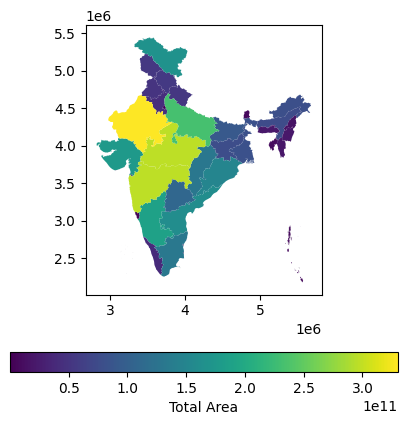

In [ ]:
india.plot(column='Shape_Area',legend=True,
                legend_kwds={'label': "Total Area",
                             'orientation': "horizontal"},figsize=(5,5))

# Changing colors

*colors* can be modified by plot with the *cmap* option

<Axes: >

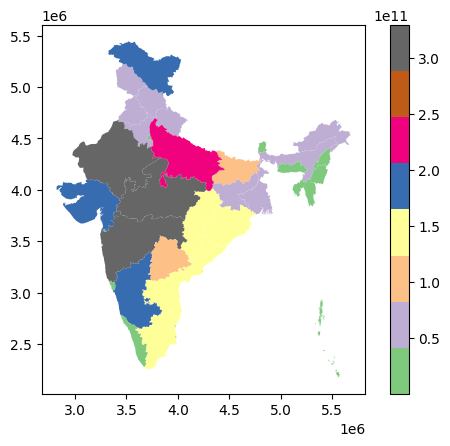

In [ ]:
india.plot(column='Shape_Area',cmap='Accent',legend=True,)

The way color maps are *scaled* can also be manipulated with the *scheme* option.The *scheme* option can be set to any scheme provided by mapclassify (e.g. ‘box_plot’, ‘equal_interval’, ‘fisher_jenks’, ‘fisher_jenks_sampled’, ‘headtail_breaks’, ‘jenks_caspall’, ‘jenks_caspall_forced’, ‘jenks_caspall_sampled’, ‘max_p_classifier’, ‘maximum_breaks’, ‘natural_breaks’, ‘quantiles’, ‘percentiles’, ‘std_mean’ or ‘user_defined’)

`A classification scheme` is a method for binning continuous data values into 4-7 classes (the default is 5) and map those classes to a color palette.

The commonly used classifications schemes include:

**Equal intervals**

Equal-size data ranges (e.g., values within 0-10, 10-20, 20-30, etc.).
Pros:
Best for data spread across entire range of values.
Easily understood by map readers.
Cons:
Avoid if you have highly skewed data or a few big outliers.

**Quantiles**

Equal number of observations in each bin
Pros:
Looks nice, because it best spreads colors across full set of data values.
Thus, it's often the default scheme for mapping software.
Cons:
Bins ranges based on the number of observations, not on the data values.
Thus, different classes can have very similar or very different values.

**Natural breaks**

Minimizes within-class variance and maximize between-class differences.
Typical method is 'fisher-jenks'.
Pros:
Great for exploratory data analysis, because it can identify natural groupings.
Cons:
Class breaks are best fit to one dataset, so the same bins can't always be used for multiple years.

<Axes: >

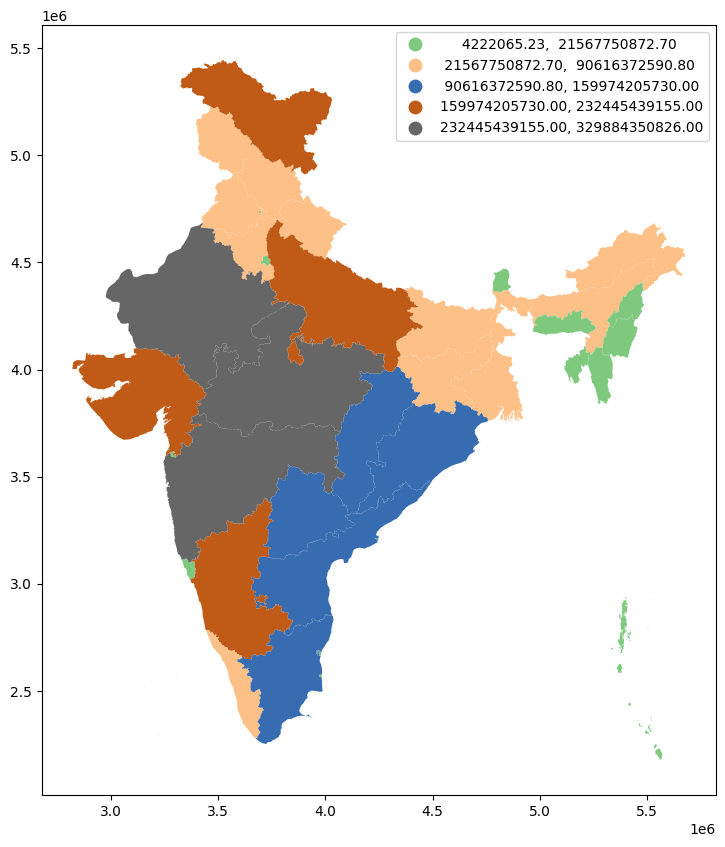

In [ ]:
india.plot(column='Shape_Area',cmap='Accent',legend=True,scheme='natural_breaks'
                ,figsize=(10,10))

# Multi Layer maps

Before combining maps, remember to always ensure they share a common CRS (so they will align)

In [ ]:
vector_file = r'STATE_BOUNDARY.shp'
state_hqs_file = r'STATE_HQ.shp'
india = gpd.read_file(vector_file)
state_hqs = gpd.read_file(state_hqs_file)

In [ ]:
india.crs

<Projected CRS: PROJCS["LCC_WGS84",GEOGCS["WGS 84",DATUM["WGS_1984 ...>
Name: LCC_WGS84
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
state_hqs.crs

<Projected CRS: PROJCS["LCC_WGS84",GEOGCS["WGS 84",DATUM["WGS_1984 ...>
Name: LCC_WGS84
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

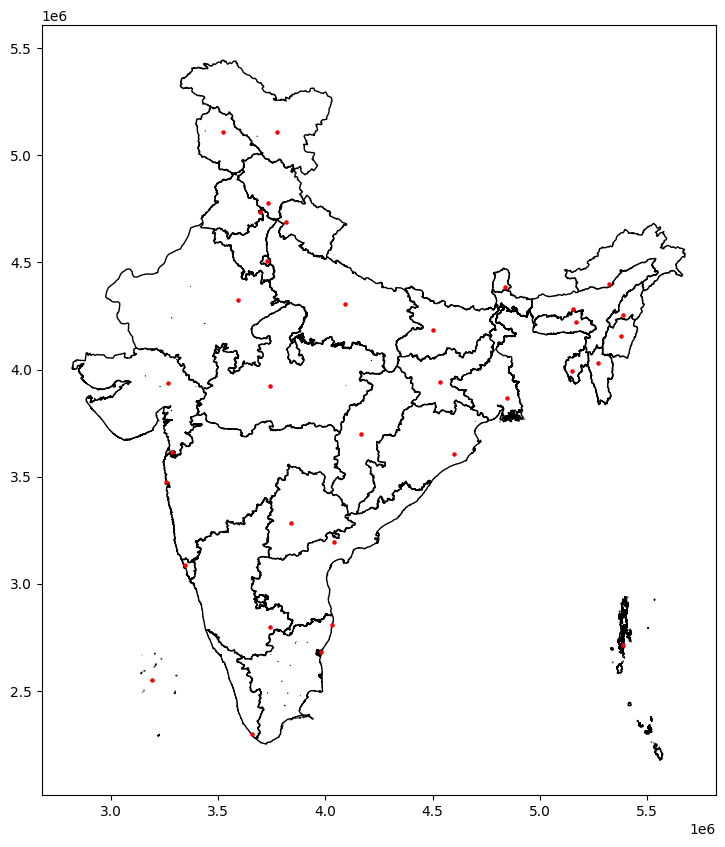

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
india.plot(ax=ax, color='white', edgecolor='black')
state_hqs.plot(ax=ax, marker='o', color='red', markersize=5)

In [ ]:
plt.close()

# Basic Geospatial Analysis

In **spatial analysis**, our goal is not just to make nice maps, but to actually run analyses that leverage the explicitly spatial nature of our data. The process of doing this is known as **spatial analysis**.

To construct spatial analyses, we string together series of spatial operations in such a way that the end result answers our question of interest. There are many such spatial operations. These are known as **spatial queries**.

These queries can be divided into:

`Measurement queries`

<li>What is feature A's length?</li>
<li>What is feature A's area?</li>
<li>What is feature A's perimeter?</li>
<li>What is feature A's distance from feature B?</li>

`Relationship queries`
<li>Is feature A within feature B?</li>
<li>Does feature A intersect with feature B?</li>
<li>Does feature A cross feature B?</li>

In [ ]:
vector_file = r'STATE_BOUNDARY.shp'

In [ ]:
india = gpd.read_file(vector_file)

In [ ]:
india.head()

In [ ]:
india.area

In [ ]:
india['New_Area'] = india.area

In [ ]:
india.head()

![image.png](attachment:image.png)

In [ ]:
from shapely.geometry import Polygon, LineString, Point

In [ ]:
s = gpd.GeoSeries(
    [
        Polygon([(0, 0), (2, 2), (0, 2)]),
        LineString([(0, 0), (2, 2)]),
        LineString([(2, 0), (0, 2)]),
        Point(0, 1),
    ],
)

In [ ]:
s

In [ ]:
s.plot()

![image.png](attachment:image.png)

In [ ]:
line = LineString([(-1, 1), (3, 1)])

In [ ]:
s.intersects(line)

In [ ]:
gpd.read_file(vector_file)

In [ ]:
states_file = 'STATE_BOUNDARY.shp'
towns_file = 'MAJOR_TOWNS.shp'

In [ ]:
states = gpd.read_file(states_file)
towns = gpd.read_file(towns_file)

In [ ]:
states.head()

In [ ]:
andhra = states[states['STATE']=='ANDHRA PRADESH']

In [ ]:
towns_in_andhra = towns.within(andhra.geometry.squeeze())

In [ ]:
andhra_towns = towns[towns_in_andhra]

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
# Plot the Berkeley border
andhra.plot(color='lightgrey', ax=ax)
# Add the Berkeley schools
andhra_towns.plot(color='purple', ax=ax)

### Proximity Analysis

In [ ]:
states_file = 'STATE_BOUNDARY.shp'
towns_file = 'MAJOR_TOWNS.shp'
state_hq_files = 'STATE_HQ.shp'

In [ ]:
states = gpd.read_file(states_file)
state_hqs = gpd.read_file(state_hq_files)
towns = gpd.read_file(towns_file)

In [ ]:
hq_buf = state_hqs.buffer(distance=10000)

In [ ]:
towns_near_hq = towns.within(hq_buf.unary_union)

In [ ]:
town_hq = towns[towns_near_hq]

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
# Plot the Berkeley boundary (for reference)
states.plot(color='lightgrey', ax=ax)
# plot the BART stations (for reference)
state_hqs.plot(color='green', ax=ax)
# add the BART buffers (for check)
town_hq.plot(color='lightgreen', ax=ax, alpha=0.5)
# add all Berkeley schools (for reference)
#berkeley_schools.plot(ax=ax)
# add the schools near BART (for check)
#bart_schools.plot(color='yellow', markersize=50, ax=ax)

In [ ]:
town_hq.explore()

In [ ]:
plt.close()

In [ ]:
town_hq

In [ ]:
vector_file = r'STATE_BOUNDARY.shp'
india = gpd.read_file(vector_file)

# convex_hull
Returns a representation of the smallest convex Polygon containing all the points in the object unless the number of points in the object is less than three

In [ ]:
ch = india.convex_hull

<Axes: >

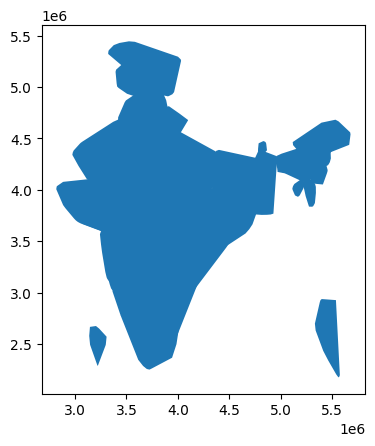

In [ ]:
ch.plot()

# envelope
Returns a representation of the point or smallest rectangular polygon that contains the object.

In [ ]:
env = india.envelope

<Axes: >

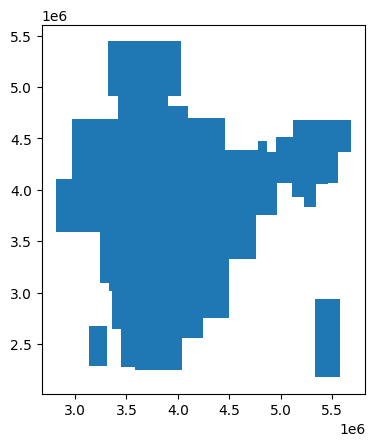

In [ ]:
env.plot()

# simplify
eturns a simplified representation of the geometric object.All points in the simplified object will be within the tolerance distance of the original geometry.

In [ ]:
sim = india.simplify(0.05,preserve_topology=False)

<Axes: >

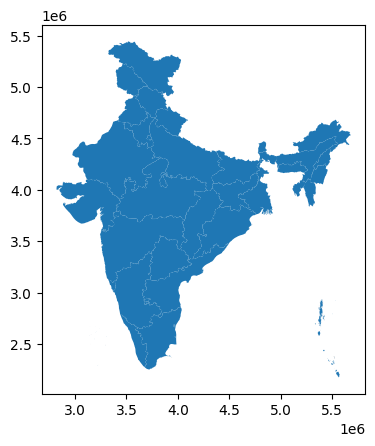

In [ ]:
sim.plot()

# Thank You